In [1]:
from iFinDPy import *
import pandas as pd
import numpy as np
import tqdm
import datetime
import sqlite3
import matplotlib.pyplot as plt
from iFinDPy import *

from const import *


e:\Anaconda\Lib\site-packages\iFinDPy.pth


In [2]:
import numpy as np
from sklearn.svm import SVR  # 支持向量回归
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 数据下载

In [3]:
userID = "zxqh172"
password = "OiLFuJE95"

In [4]:
THS_iFinDLogin(userID,password)

In [3]:
PRICE_COLUMNS = 'open,high,low,close,avgPrice,changeRatio,volume,amount'

In [88]:
START_DATE = "2019-10-01"
END_DATE = "2024-3-31"

In [89]:
PATH_DATABASES = "databases/{}"

PATH_PRICE_BYX = PATH_DATABASES.format("price_byx.csv")
PATH_PRICE_YY = PATH_DATABASES.format("price_yy.csv")
PATH_PRICE_SL = PATH_DATABASES.format("price_sl.csv")

PATH_INDEX_SP = PATH_DATABASES.format("index_sp.csv")
PATH_INDEX_BYX = PATH_DATABASES.format("index_byx.csv")
PATH_INDEX_SYHG = PATH_DATABASES.format("index_syhg.csv")

PATH_BASIC_BYX = PATH_DATABASES.format("byx_basic.csv")

PATH_AU = PATH_DATABASES.format("au_price.csv")

PATH_DICT = {"EBZL.DCE": PATH_PRICE_BYX, "SCZL.SHF": PATH_PRICE_YY, "LZL.DCE": PATH_PRICE_SL,
             "NHCI.SL": PATH_INDEX_SP, "NHEBI.SL": PATH_INDEX_BYX, "NHPCI.SL": PATH_INDEX_SYHG,
             "AU9999.SHG": PATH_AU}

In [90]:
class DataDownloader(object):
    """
    used to downloaded the data
    """
    path_dict = PATH_DICT

    def  save_data(self, data: pd.DataFrame, path):
        data.to_csv(path)
        pass

    def download_data(self, index, 
                      columns=PRICE_COLUMNS, 
                      start_date=START_DATE, end_date=END_DATE):
        
        data = THS_HQ(index, columns, 'CPS:7', start_date, end_date)
        return data.data
    
    def download_all_data(self):
        for index, path in tqdm.tqdm(self.path_dict.items()):
            # print(index)
            data = self.download_data(index=index)
            data.to_csv(path)
        pass
        


In [91]:
data_downloader = DataDownloader()
data_downloader.download_all_data()

  0%|          | 0/7 [00:03<?, ?it/s]


AttributeError: 'NoneType' object has no attribute 'to_csv'

In [74]:
df_basic = THS_DR('p00739','sdate=20191001;edate=20240430;jys=大连商品交易所;p0=EB','p00739_f001:Y,p00739_f002:Y,p00739_f003:Y,p00739_f004:Y,p00739_f005:Y,p00739_f006:Y,p00739_f007:Y,p00739_f008:Y,p00739_f009:Y,p00739_f010:Y,p00739_f011:Y','format:dataframe').data
df_basic= df_basic.iloc[::-1, :]
df_basic.to_csv(PATH_BASIC_BYX)

# read data

In [75]:
class DataReader(object):
    """
    used to read the data
    """
    def __init__(self) -> None:
        self.trade_date_list = self.get_trade_date_list()
        pass

    def get_trade_date_list(self):
        data_yx = pd.read_csv(PATH_PRICE_BYX)
        return pd.DataFrame(data_yx["time"])
    
    def _read_data(self, path):
        data = pd.read_csv(path)
        data_ = pd.merge(data, pd.DataFrame(columns=["time"], data=self.trade_date_list), how="right", on="time")
        data_.drop(columns=["Unnamed: 0"], inplace=True)
        data_.index = pd.to_datetime(data_["time"])
        return data_
    

    def read_price_byx(self):
        return self._read_data(path=PATH_PRICE_BYX)
    
    def read_price_yy(self):
        return self._read_data(path=PATH_PRICE_YY)
    
    def read_price_sl(self):
        return self._read_data(path=PATH_PRICE_SL)
    
    def read_index_sp(self):
        return self._read_data(path=PATH_INDEX_SP)
    
    def read_au(self):
        return self._read_data(path=PATH_AU)
    
    def read_baisc(self):
        df_basic = pd.read_csv(PATH_BASIC_BYX)
        df_basic = df_basic[["p00739_f001", "p00739_f004", "p00739_f005"]]
        df_basic.columns = ["time", "近月持仓", "全部持仓"]

        df_time = pd.DataFrame(columns=["time"], data=self.trade_date_list)
        df_time["time"] = pd.to_datetime(df_time["time"])
        df_basic["time"] = pd.to_datetime(df_basic["time"])
        
        df_basic = pd.merge(df_basic, df_time, how="right", on="time")
        df_basic.index = pd.to_datetime(df_basic["time"])

        return df_basic
    
    

In [71]:
data_reader = DataReader()

In [76]:
df_basic = data_reader.read_baisc()

In [78]:
df_basic

,time,近月持仓,全部持仓
time,,,
2019-09-26,2019-09-26,12244.0,33582.0
2019-09-27,2019-09-27,9870.0,29142.0
2019-09-30,2019-09-30,8784.0,26302.0
2019-10-08,2019-10-08,8382.0,26674.0
2019-10-09,2019-10-09,7512.0,27734.0
...,...,...,...
2024-04-19,2024-04-19,2150.0,474820.0
2024-04-22,2024-04-22,2150.0,465057.0
2024-04-23,2024-04-23,1800.0,455869.0


# data observation

In [80]:
df_byx = data_reader.read_price_byx()
df_byx = df_byx.iloc[:, 2:]

In [86]:
df_au = data = pd.read_csv(PATH_AU)

In [81]:
df_yy = data_reader.read_price_yy()
df_sl = data_reader.read_price_sl()
df_index = data_reader.read_index_sp()
df_au = data_reader.read_au()


df_var = pd.concat([df_yy["close"], df_sl["close"], df_index["close"], df_au["close"]], axis=1)
df_var.columns = ["yy_close", "sl_close", "index_close", "au_close"]

df_vars = pd.concat([df_byx, df_var], axis=1)

KeyError: 'time'

In [ ]:
df_vars.head()

,open,high,low,close,avgPrice,changeRatio,volume,amount,yy_close,sl_close,index_close,au_close
time,,,,,,,,,,,,
2019-09-26,8100,8216,8051,8125,8145.188684,1.562500,82010,333993.462,450.5,7530,1475.579,347.20
2019-09-27,8020,8068,7901,7940,7977.451471,-1.610905,39914,159205.999,448.5,7470,1465.408,345.25
2019-09-30,7905,7999,7905,7976,7956.888921,-0.012536,13738,54655.870,447.0,7535,1470.275,344.49
2019-10-08,7950,7998,7920,7968,7962.263254,0.150830,5470,21776.790,440.0,7410,1469.427,344.00
2019-10-09,7971,8018,7940,7952,7974.696077,-0.125597,12898,51428.815,449.3,7390,1470.712,348.39


In [9]:
## 开始计算相关性
df_corr = df_vars.copy()
df_corr["close_1"] = df_corr["close"].shift(-1)
df_corr["close_3"] = df_corr["close"].shift(-3)
df_corr["close_5"] = df_corr["close"].shift(-5)

In [ ]:
df_corr.corr()[["close", "close_1", "close_3", "close_5"]]

,close,close_1,close_3,close_5
open,0.994497,0.988056,0.973964,0.959197
high,0.997588,0.990881,0.976875,0.962134
low,0.997589,0.991000,0.976728,0.962612
close,1.000000,0.993069,0.979024,0.964801
avgPrice,0.998493,0.991819,0.977697,0.963275
changeRatio,0.084932,0.084579,0.089119,0.099410
volume,0.361395,0.363849,0.369527,0.368566
amount,0.512879,0.512854,0.512936,0.505501
yy_close,0.772247,0.767751,0.759553,0.750810
sl_close,0.854821,0.853338,0.849755,0.845649


滞后期数越多，相关性越低
ChangeRatio 应该被去除
au_close 需要进一步考察

In [ ]:
df_corr

,open,high,low,close,avgPrice,changeRatio,volume,amount,yy_close,sl_close,index_close,au_close,close_1,close_3,close_5
time,,,,,,,,,,,,,,,
2019-09-26,8100,8216,8051,8125,8145.188684,1.562500,82010,3.339935e+05,450.5,7530,1475.579,347.20,7940.0,7968.0,7843.0
2019-09-27,8020,8068,7901,7940,7977.451471,-1.610905,39914,1.592060e+05,448.5,7470,1465.408,345.25,7976.0,7952.0,7826.0
2019-09-30,7905,7999,7905,7976,7956.888921,-0.012536,13738,5.465587e+04,447.0,7535,1470.275,344.49,7968.0,7843.0,7770.0
2019-10-08,7950,7998,7920,7968,7962.263254,0.150830,5470,2.177679e+04,440.0,7410,1469.427,344.00,7952.0,7826.0,7649.0
2019-10-09,7971,8018,7940,7952,7974.696077,-0.125597,12898,5.142882e+04,449.3,7390,1470.712,348.39,7843.0,7770.0,7526.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-19,9652,9780,9580,9652,9668.180248,0.489328,353146,1.707140e+06,651.7,8464,2678.670,565.55,9531.0,9498.0,NaN
2024-04-22,9605,9685,9528,9531,9613.377602,-1.417046,215494,1.035813e+06,633.2,8462,2660.190,556.55,9415.0,9499.0,NaN
2024-04-23,9460,9525,9405,9415,9473.398696,-1.423935,303103,1.435708e+06,637.8,8356,2641.470,544.01,9498.0,NaN,NaN


In [10]:
df_corr_train = df_corr[df_corr.index<pd.to_datetime("2023-01-01")]
df_corr_test = df_corr[df_corr.index>=pd.to_datetime("2023-01-01")]

In [11]:
features_list = ['open', 'high', 'low', 'close', 'avgPrice', 'volume', 'amount', 
                 'yy_close', 'sl_close', 
                 'index_close', 'au_close', 'close_1']

target = "close"

# 线性模型

##  查看变量相关性

In [ ]:
import statsmodels.api as sm

lag = 5
x = df_corr[features_list].iloc[:-lag]
y = df_corr[target].iloc[lag:]

x.index = list(range(x.shape[0]))
y.index = list(range(y.shape[0]))

# 创建并拟合模型
model = sm.OLS(y, x)
results = model.fit()

# 打印摘要统计
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  close   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          6.900e+04
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                        16:39:52   Log-Likelihood:                         -7851.5
No. Observations:                1104   AIC:                                  1.573e+04
Df Residuals:                    1092   BIC:                                  1.579e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

在窗口期内，苯乙烯自身的价格数据系数均不显著，但是其他变量均显著

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

In [13]:
# 回归类定义

class Model(object):
    """
    1. 传入变量数据
    2. 划分x，y函数
    3. 模型训练函数
    4. 结果分析和画图函数
    """

    def __init__(self, data):
        self.data = data

    def construct(self, lag=5):
        x = df_corr[features_list].iloc[:-lag]
        y = df_corr[target].iloc[lag:]

        x.index = list(range(x.shape[0]))
        y.index = list(range(y.shape[0]))
        return x, y
    
    def test_linear_model(self, lag, train_size, test_size):

        x, y = self.construct(lag=lag)
        tscv = tscv = TimeSeriesSplit(max_train_size=train_size, test_size=test_size, n_splits=(self.data.shape[0]-train_size)//test_size)

        mse_scores = []
        y_pred_list = []
        y_test_list = []
        
        for train_index, test_index in tscv.split(x):
            X_train, X_test = x.iloc[train_index, :], x.iloc[test_index, :]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # 创建并训练SVM模型
            model = LinearRegression()
            model.fit(X_train, y_train)

            # 在测试集上进行预测
            y_pred = model.predict(X_test)
            y_pred_list += list(y_pred)
            y_test_list += list(y_test)

            # 计算MSE并保存
            mse = mean_squared_error(y_test, y_pred)
            mse_scores.append(mse)

        # 计算平均MSE
        average_mse = np.mean(mse_scores)
        print(f"Average MSE: {average_mse}")

        result_dict = {"mse_list": mse_scores, "average_mse": average_mse, 
                       "plot_price": pd.DataFrame({"price_true": list(y_test_list), "price_predict": y_pred_list}, index=self.data.index[-len(list(y_pred_list)):])}
        
        return result_dict
    
    def test_svm_model(self, lag, train_size, test_size):

        x, y = self.construct(lag=lag)
        tscv = tscv = TimeSeriesSplit(max_train_size=train_size, test_size=test_size, n_splits=(self.data.shape[0]-train_size)//test_size)

        mse_scores = []
        y_pred_list = []
        y_test_list = []
        
        for train_index, test_index in tscv.split(x):
            X_train, X_test = x.iloc[train_index, :], x.iloc[test_index, :]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # 创建并训练SVM模型
            model = SVR(kernel="linear")
            # model.fit(X_train, y_train)
            model.fit(X_train_scaled, y_train)

            # 在测试集上进行预测
            # y_pred = model.predict(X_test)
            y_pred = model.predict(X_test_scaled)
            y_pred_list += list(y_pred)
            y_test_list += list(y_test)

            # 计算MSE并保存
            mse = mean_squared_error(y_test, y_pred)
            mse_scores.append(mse)

        # 计算平均MSE
        average_mse = np.mean(mse_scores)
        print(f"Average MSE: {average_mse}")

        result_dict = {"mse_list": mse_scores, "average_mse": average_mse, 
                       "plot_price": pd.DataFrame({"price_true": list(y_test_list), "price_predict": y_pred_list}, index=self.data.index[-len(list(y_pred_list)):])}
        
        return result_dict
    
    

In [111]:
model = Model(data=df_corr_train)

lag_list = [1,3,5, 10]
train_size_list = [60, 120, 250, 500]
test_size_list = [5, 20, 60, 120]

result_lag_list = []
result_train_size_list = []
result_test_size_list = []
result_mse_list = []

for lag in lag_list:
    for train_size in train_size_list:
        for test_size in test_size_list:

            result_dict = model.test_linear_model(lag, train_size, test_size)
            result_lag_list.append(lag)
            result_train_size_list.append(train_size)
            result_test_size_list.append(test_size)
            result_mse_list.append(result_dict["average_mse"])

df_result = pd.DataFrame({"lag": result_lag_list, "train_size": result_train_size_list, "tesr_size": result_test_size_list, "mse": result_mse_list})
df_result.to_csv("result/linear_1.csv")


Average MSE: 1.2847361349487984e-21
Average MSE: 3.4151059190201634e-21
Average MSE: 9.783386786013986e-22
Average MSE: 1.3478182000791677e-20
Average MSE: 1.1163111015885403e-21
Average MSE: 1.3977509995327298e-21
Average MSE: 2.3338926049262844e-21
Average MSE: 7.233585544662241e-21
Average MSE: 7.328130910042697e-22
Average MSE: 8.3004664019392895e-22
Average MSE: 7.504504198430393e-22
Average MSE: 5.079561045323289e-22
Average MSE: 2.919508300883453e-21
Average MSE: 2.9405827643789122e-21
Average MSE: 3.049453026965021e-21
Average MSE: 2.2635073679477618e-21
Average MSE: 95573.6427709438
Average MSE: 142799.33965001107
Average MSE: 421972.9774218418
Average MSE: 918161.7487055622
Average MSE: 63941.407328298345
Average MSE: 71189.15363419004
Average MSE: 91139.78376462
Average MSE: 189581.56624678482
Average MSE: 52818.48257002171
Average MSE: 56989.452805592504
Average MSE: 57681.0793651144
Average MSE: 53042.24978237935
Average MSE: 29572.403963920842
Average MSE: 28290.302751684

## 最佳参数
1. 线性模型
   1. 1 250 120
   2. 3 500 60
   3. 5 500 20
2. SVM模型
   1. 1 250 120
   2. 3 500 20
   3. 5 500 20

两个模型均采用滞后一周，用过去2年的数据预测未来一个月

In [14]:
lag = 5
train_size = 500
test_size = 20

model = Model(data=df_corr)
dict_result_line = model.test_linear_model(lag, train_size, test_size)
dict_result_svm = model.test_svm_model(lag, train_size, test_size)

Average MSE: 98327.0089597396
Average MSE: 116528.99105156153


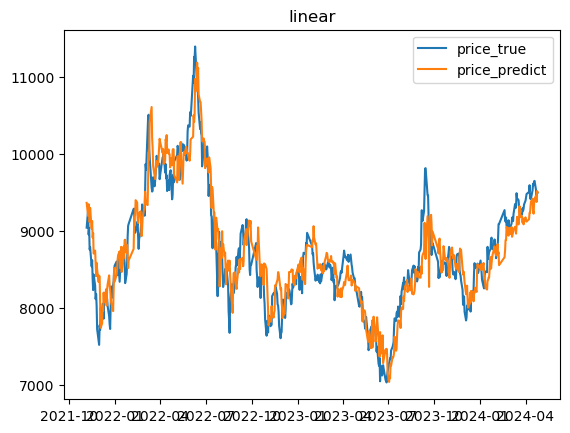

In [22]:
plt.plot(dict_result_line["plot_price"])
plt.title("linear")
plt.legend(dict_result_line["plot_price"].columns)

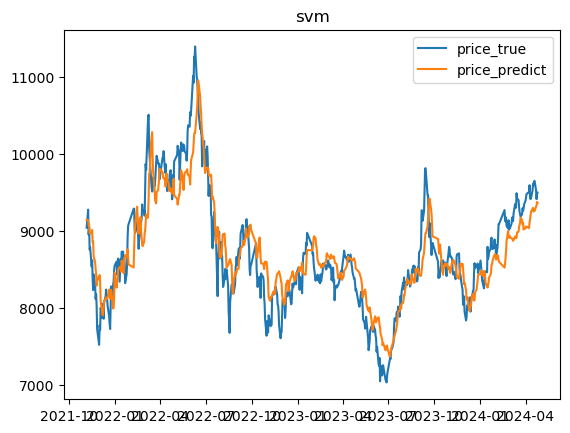

In [23]:
plt.plot(dict_result_svm["plot_price"])
plt.title("svm")
plt.legend(dict_result_line["plot_price"].columns)

# 结果展示

In [7]:
df_linear = pd.read_csv("result\linear_1.csv")
df_svm = pd.read_csv("result\svm_1.csv")

Text(0.5, 1.0, 'mse on linear')

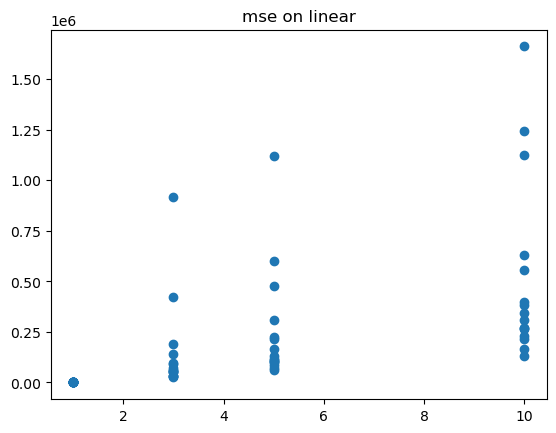

In [11]:
plt.scatter(x=df_linear["lag"], y=df_linear["mse"])
plt.title("mse on linear")

Text(0.5, 1.0, 'mse on svm')

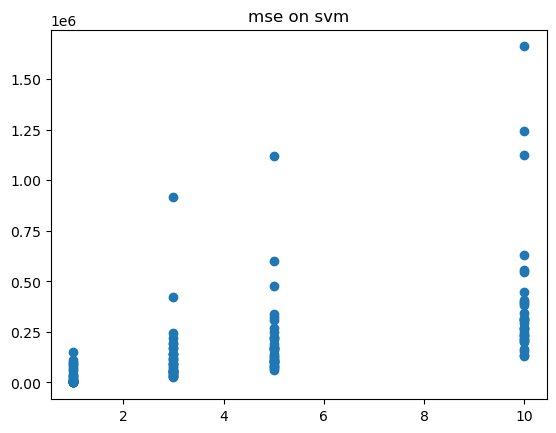

In [12]:
plt.scatter(x=df_svm["lag"], y=df_svm["mse"])
plt.title("mse on svm")